# Universelle RRS funksjoner for RRS. H1 vs H2 vs Ecolight med ATM korreksjon

## Imports

In [1]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 
import pandas as pd

funksjoner_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'funksjoner'))
if funksjoner_path not in sys.path:
    sys.path.append(funksjoner_path)

#import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac
import universal_funkjsoner as uf

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = "../data/" ## filene hentes fra en mappe over der vi er nå

hei fra utformet bedre :)


In [2]:
#importlib.reload(f)
importlib.reload(ac)
importlib.reload(atm_c)
importlib.reload(uf)

hei fra utformet bedre :)


<module 'universal_funkjsoner' from '/home/itk/Documents/AnneMarthe/Master/Hypso_H1_H2/funksjoner/universal_funkjsoner.py'>

## Data uploading 

In [ ]:
#H1
##H1
image_path_t_25_0511 = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1a.nc") 

trondheim_path_25_0511 = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1a.nc")
trondheim_path_25_0511_b = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1b.nc")
trondheim_path_25_0511_c = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1c.nc")########## OBSOBSOSOSSB IKKE TRONDHIEM
trondheim_path_25_0511_d = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1d.nc")

satobj_h1_25_0511 = Hypso1( path = trondheim_path_25_0511, verbose = True )

l1a_cube_25_0511 = satobj_h1_25_0511.l1a_cube
l1b_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_b, verbose = True )
l1c_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_c, verbose = True )
l1d_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_d, verbose = True )

l1b_cube_25_0511 = l1b_cube_25_0511.l1c_cube
l1c_cube_25_0511 = l1c_cube_25_0511.l1b_cube
l1d_cube_25_0511 = l1d_cube_25_0511.l1d_cube

satobj_h1_25_0511.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 431
[INFO] ADCS time range: 1746957180.000000 to 1746958140.000000
[INFO] Frame time range: 1746957867.923740 to 1746957917.673740
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [ ]:
cube_0511__h1 = np.array(l1d_cube_25_0511[:,:, 9:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_25_0511, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0511__h1.reshape(-1,109), solar=np.ones(109), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0511_h1 = (cube_0511__h1 - S) /T
cube_norm_0511_h1[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.007677513297904346
0.002154747147845517
0.0014970680661600475
0.0012710268858370187
0.0011681540432022797
0.001114601762058431
0.001084747517496288
0.001067094682715943
0.0010558224766535318
0.0010482716283571776


In [ ]:
## H2
i_250511_2 = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1a.nc")
i_250511_2_b = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1b.nc")
i_250511_2_c = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1c.nc")
i_250511_2_d = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1d.nc")

satobj_h1_250511_2 = Hypso2( path = i_250511_2, verbose = True )

l1a_cube_250511_2 = satobj_h1_250511_2.l1a_cube
l1b_cube_250511_2 = Hypso2( path = i_250511_2_b, verbose = True )
l1c_cube_250511_2 = Hypso2( path = i_250511_2_c, verbose = True )
l1d_cube_250511_2 = Hypso2( path = i_250511_2_d, verbose = True )

l1c_cube_250511_2 = l1c_cube_250511_2.l1c_cube
l1b_cube_250511_2 = l1b_cube_250511_2.l1b_cube
l1d_cube_250511_2 = l1d_cube_250511_2.l1d_cube

satobj_h1_250511_2.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 540
[INFO] ADCS time range: 1746964170.000000 to 1746965100.000000
[INFO] Frame time range: 1746964837.479518 to 1746964912.104518
[INFO] 299 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [ ]:
path_cla_atm_250511 = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1c.nc.polymer.nc")######
cla_atm_250511 = xr.open_dataset(path_cla_atm_250511)

latitude_250511 = np.array(cla_atm_250511['latitude'])
longitude_250511 = np.array(cla_atm_250511['longitude'])

In [ ]:
rho_vars = [var for var in cla_atm_250511.variables if re.match(r'rho_w_\d+', var)]
rho_vars_sorted = sorted(rho_vars, key=lambda v: int(v.split('_')[-1])) #A variable containing the name of all the rho vaibles
rho_vars_sorted = rho_vars_sorted[5:]
print("Sorted rho variables:", rho_vars_sorted)
print(len(rho_vars_sorted))

Sorted rho variables: ['rho_w_418', 'rho_w_422', 'rho_w_425', 'rho_w_429', 'rho_w_432', 'rho_w_436', 'rho_w_439', 'rho_w_443', 'rho_w_446', 'rho_w_450', 'rho_w_453', 'rho_w_457', 'rho_w_460', 'rho_w_464', 'rho_w_467', 'rho_w_471', 'rho_w_474', 'rho_w_478', 'rho_w_481', 'rho_w_485', 'rho_w_488', 'rho_w_492', 'rho_w_495', 'rho_w_499', 'rho_w_502', 'rho_w_506', 'rho_w_509', 'rho_w_513', 'rho_w_516', 'rho_w_520', 'rho_w_523', 'rho_w_526', 'rho_w_530', 'rho_w_533', 'rho_w_537', 'rho_w_540', 'rho_w_544', 'rho_w_547', 'rho_w_551', 'rho_w_554', 'rho_w_558', 'rho_w_561', 'rho_w_565', 'rho_w_568', 'rho_w_572', 'rho_w_575', 'rho_w_579', 'rho_w_582', 'rho_w_585', 'rho_w_589', 'rho_w_592', 'rho_w_596', 'rho_w_599', 'rho_w_603', 'rho_w_606', 'rho_w_610', 'rho_w_613', 'rho_w_617', 'rho_w_620', 'rho_w_623', 'rho_w_627', 'rho_w_630', 'rho_w_634', 'rho_w_637', 'rho_w_641', 'rho_w_644', 'rho_w_648', 'rho_w_651', 'rho_w_654', 'rho_w_658', 'rho_w_661', 'rho_w_665', 'rho_w_668', 'rho_w_672', 'rho_w_675', 'r

### Jorsph Garret AC on H2

In [ ]:
cube_0511_h2 = np.array(l1d_cube_250511_2[:,:, 9:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_250511_2, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0511_h2.reshape(-1,109), solar=np.ones(109), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0511_h2 = (cube_0511_h2 - S) /T
cube_norm_0511_h2[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0046692316580563345
0.0015608339822842526
0.001058874956094354
0.0008441526108023653
0.0007504512929581036
0.0007054564552798847
0.000681189750039593
0.0006670219142535933
0.0006582707032843989
0.0006525668427882068


## Target lat long

In [ ]:
#wl = satobj_h1_25_0511.wavelengths[9:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[9:118]

#target_lat_6 = [64.20992561747796,64.48557437461893,64.52896641587218,  64.22009411667561] #område 7  #må du flytte det tredje koorrdinatet fram her 
#target_lon_6 = [9.704720121565003,9.886201113342556, 8.708294855080245,8.73032214102829]  ## for at det skal blir rett med det nnye inramminga av piksler.

#target_lat_5 = [63.896904083590066,64.17324887890479,64.11631446557637,  63.887923483169004] #område 6.1 ## prøvd å flytte korordinat 3 frem her :))
#target_lon_5 = [9.578289180688513,9.582148298814932,8.924448409066027,  8.96230357578283]
target_lat_6 = [64.152913,64.254748,64.280744,  64.145967]
target_lon_6 = [9.500527 ,9.579630 , 9.258824 ,  9.242894 -0.25]  

target_lat_5 = [63.856648, 63.959085, 63.949196,  63.853017]
target_lon_5 = [9.500427, 9.415833, 9.148865,  9.154358]

target_lat_3 = [63.65192496143867,63.818490304354434,63.793837321385155,  63.660555970548074] #område 2.1.
target_lon_3 = [9.526455044589706,9.531415429238418, 9.442656298818237,9.439764451470932]

target_lat_2 = [63.47865598622861,63.646767083517425,63.61771951990031,  63.42721372576498] #område 5.1
target_lon_2 = [10.061035990832918,9.804697410334523, 9.723689711502818,9.982929114384596]  

target_lat_1 = [63.44802428401152,63.52676744792975, 63.55113867486421,  63.46332195091103] #område 8 
target_lon_1 = [10.706024496195505,10.726421572030368, 10.227932960954064,  10.211631333282082] 

calibration_lat = [63.642540,63.642540, 63.642540,  63.642540] ##
calibration_long = [9.503311,9.503311, 9.503311,  9.503311]

In [ ]:
cal_x_250511 = 72
cal_y_250511 = -19

## RRS H1 AC

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Antall piksler i RRS_H1_AC: 8


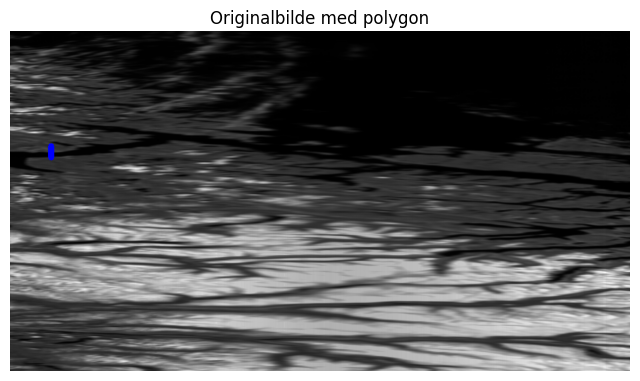

[np.int64(175), np.int64(176), np.int64(177), np.int64(178), np.int64(179), np.int64(180), np.int64(168), np.int64(169), np.int64(170), np.int64(171), np.int64(172), np.int64(173), np.int64(174), np.int64(175), np.int64(176), np.int64(177), np.int64(178), np.int64(179), np.int64(180), np.int64(181), np.int64(182), np.int64(183), np.int64(184), np.int64(185), np.int64(186), np.int64(161), np.int64(162), np.int64(163), np.int64(164), np.int64(165), np.int64(166), np.int64(167), np.int64(168), np.int64(169), np.int64(170), np.int64(171), np.int64(172), np.int64(173), np.int64(174), np.int64(175), np.int64(176), np.int64(177), np.int64(178), np.int64(179), np.int64(180), np.int64(181), np.int64(182), np.int64(183), np.int64(184), np.int64(185), np.int64(186), np.int64(187), np.int64(188), np.int64(189), np.int64(190), np.int64(191), np.int64(192), np.int64(162), np.int64(163), np.int64(164), np.int64(165), np.int64(166), np.int64(167), np.int64(168), np.int64(169), np.int64(170), np.int64(

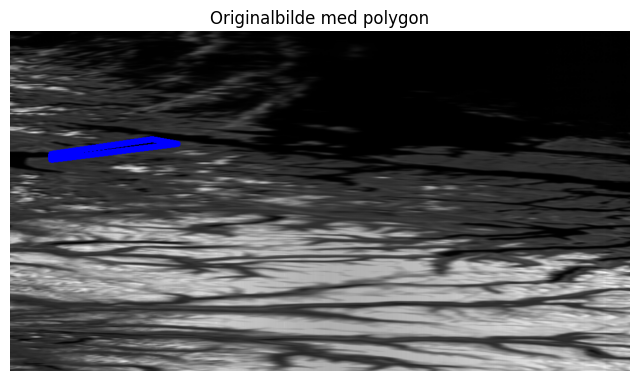

[np.int64(439), np.int64(440), np.int64(441), np.int64(442), np.int64(443), np.int64(437), np.int64(438), np.int64(439), np.int64(440), np.int64(441), np.int64(442), np.int64(443), np.int64(444), np.int64(445), np.int64(446), np.int64(447), np.int64(448), np.int64(449), np.int64(450), np.int64(435), np.int64(436), np.int64(437), np.int64(438), np.int64(439), np.int64(440), np.int64(441), np.int64(442), np.int64(443), np.int64(444), np.int64(445), np.int64(446), np.int64(447), np.int64(448), np.int64(449), np.int64(450), np.int64(451), np.int64(452), np.int64(453), np.int64(454), np.int64(455), np.int64(456), np.int64(457), np.int64(433), np.int64(434), np.int64(435), np.int64(436), np.int64(437), np.int64(438), np.int64(439), np.int64(440), np.int64(441), np.int64(442), np.int64(443), np.int64(444), np.int64(445), np.int64(446), np.int64(447), np.int64(448), np.int64(449), np.int64(450), np.int64(451), np.int64(452), np.int64(453), np.int64(454), np.int64(455), np.int64(456), np.int64(

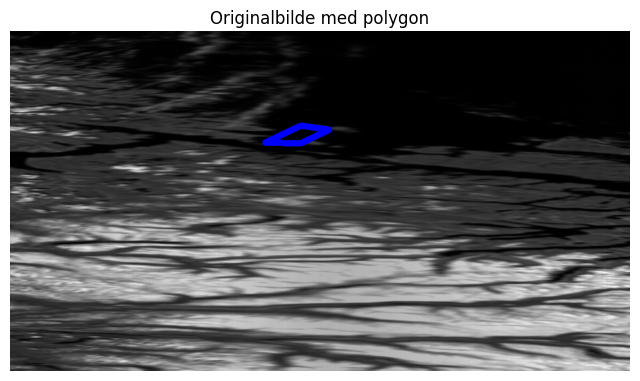

[np.int64(570), np.int64(571), np.int64(572), np.int64(573), np.int64(574), np.int64(575), np.int64(576), np.int64(577), np.int64(578), np.int64(579), np.int64(580), np.int64(581), np.int64(582), np.int64(564), np.int64(565), np.int64(566), np.int64(567), np.int64(568), np.int64(569), np.int64(570), np.int64(571), np.int64(572), np.int64(573), np.int64(574), np.int64(575), np.int64(576), np.int64(577), np.int64(578), np.int64(579), np.int64(580), np.int64(581), np.int64(582), np.int64(583), np.int64(584), np.int64(585), np.int64(586), np.int64(587), np.int64(588), np.int64(589), np.int64(590), np.int64(591), np.int64(592), np.int64(593), np.int64(594), np.int64(595), np.int64(596), np.int64(597), np.int64(598), np.int64(599), np.int64(600), np.int64(601), np.int64(602), np.int64(603), np.int64(604), np.int64(558), np.int64(559), np.int64(560), np.int64(561), np.int64(562), np.int64(563), np.int64(564), np.int64(565), np.int64(566), np.int64(567), np.int64(568), np.int64(569), np.int64(

In [ ]:
RRS_AC_H1_250511_A1 = uf.automated_RRS_H1_AC(satobj_h1_25_0511, l1d_cube_25_0511, cube_norm_0511_h1, target_lat_1, target_lon_1, cal_x_250511, cal_y_250511 )
RRS_AC_H1_250511_A2 = uf.automated_RRS_H1_AC(satobj_h1_25_0511, l1d_cube_25_0511, cube_norm_0511_h1, target_lat_2, target_lon_2, cal_x_250511, cal_y_250511 )
RRS_AC_H1_250511_A3 = uf.automated_RRS_H1_AC(satobj_h1_25_0511, l1d_cube_25_0511, cube_norm_0511_h1, target_lat_3, target_lon_3, cal_x_250511, cal_y_250511 )
RRS_AC_H1_250511_A5 = uf.automated_RRS_H1_AC(satobj_h1_25_0511, l1d_cube_25_0511, cube_norm_0511_h1, target_lat_5, target_lon_5, cal_x_250511, cal_y_250511 )
RRS_AC_H1_250511_A6 = uf.automated_RRS_H1_AC(satobj_h1_25_0511, l1d_cube_25_0511, cube_norm_0511_h1, target_lat_6, target_lon_6, cal_x_250511, cal_y_250511 )

In [ ]:
RRS_median_H1_AC_A1 = np.median(RRS_AC_H1_250511_A1, axis=0)
RRS_median_H1_AC_A2 = np.median(RRS_AC_H1_250511_A2, axis=0)
RRS_median_H1_AC_A3 = np.median(RRS_AC_H1_250511_A3, axis=0)
RRS_median_H1_AC_A5 = np.median(RRS_AC_H1_250511_A5, axis=0)
RRS_median_H1_AC_A6 = np.median(RRS_AC_H1_250511_A6, axis=0)

print(RRS_median_H1_AC_A1.shape)

(109,)


## RRS H2 AC

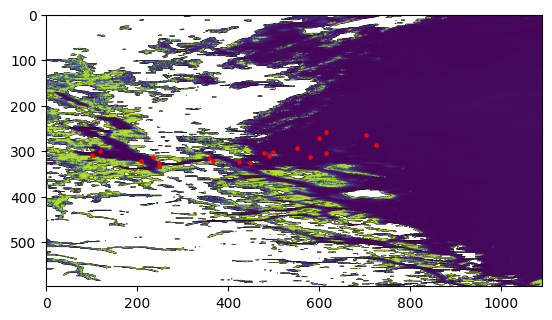

In [ ]:
RRS_AC_H2_250511_A1 = uf.automated_RRS_H2_AC(satobj_h1_250511_2, l1d_cube_250511_2, cla_atm_250511, rho_vars_sorted, target_lat_1, target_lon_1, latitude_250511, longitude_250511)
RRS_AC_H2_250511_A2 = uf.automated_RRS_H2_AC(satobj_h1_250511_2, l1d_cube_250511_2, cla_atm_250511, rho_vars_sorted, target_lat_2, target_lon_2, latitude_250511, longitude_250511)
RRS_AC_H2_250511_A3 = uf.automated_RRS_H2_AC(satobj_h1_250511_2, l1d_cube_250511_2, cla_atm_250511, rho_vars_sorted, target_lat_3, target_lon_3, latitude_250511, longitude_250511)
RRS_AC_H2_250511_A5 = uf.automated_RRS_H2_AC(satobj_h1_250511_2, l1d_cube_250511_2, cla_atm_250511, rho_vars_sorted, target_lat_5, target_lon_5, latitude_250511, longitude_250511)
RRS_AC_H2_250511_A6 = uf.automated_RRS_H2_AC(satobj_h1_250511_2, l1d_cube_250511_2, cla_atm_250511, rho_vars_sorted, target_lat_6, target_lon_6, latitude_250511, longitude_250511)

In [ ]:
RRS_median_H2_AC_A1 = np.median(RRS_AC_H2_250511_A1, axis=0)
RRS_median_H2_AC_A2 = np.median(RRS_AC_H2_250511_A2, axis=0)
RRS_median_H2_AC_A3 = np.median(RRS_AC_H2_250511_A3, axis=0)
RRS_median_H2_AC_A5 = np.median(RRS_AC_H2_250511_A5, axis=0)
RRS_median_H2_AC_A6 = np.median(RRS_AC_H2_250511_A6, axis=0)

print(RRS_median_H2_AC_A1.shape)

(109,)


### RRS H2 Josepg Garret AC

hei fra utformet bedre :)
Antall piksler i RRS_H1_AC: 1477


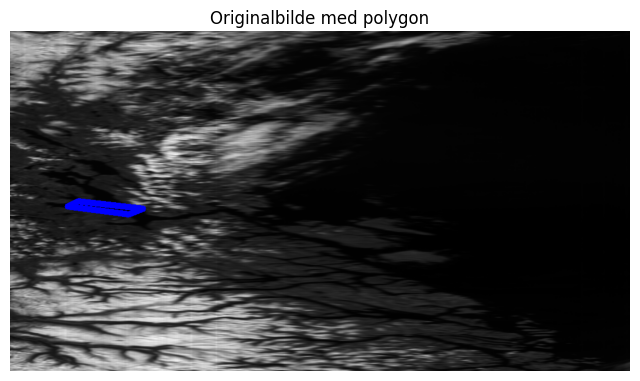

Antall piksler i RRS_H1_AC: 657


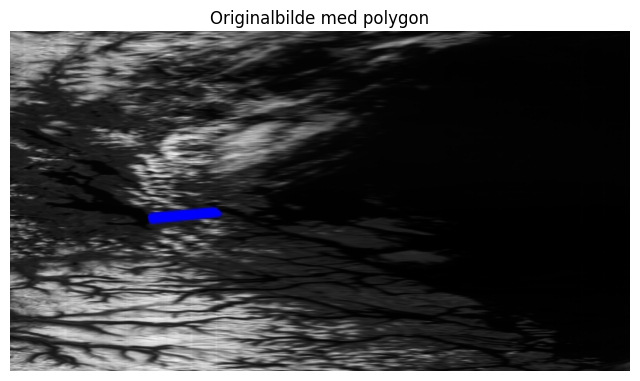

Antall piksler i RRS_H1_AC: 521


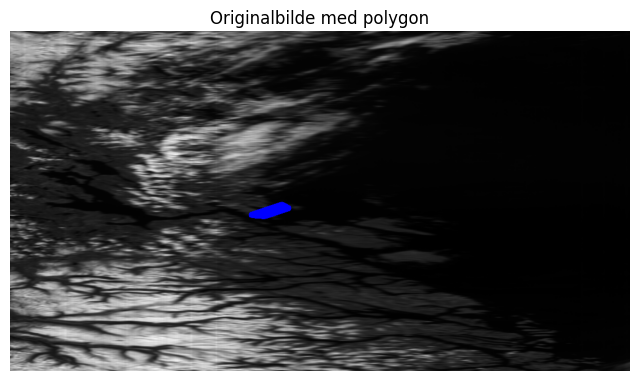

Antall piksler i RRS_H1_AC: 1215


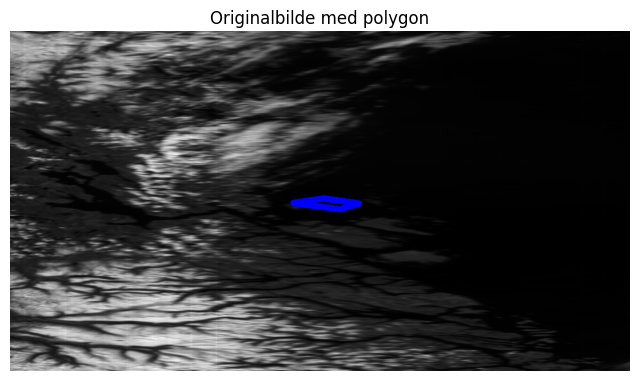

Antall piksler i RRS_H1_AC: 1950


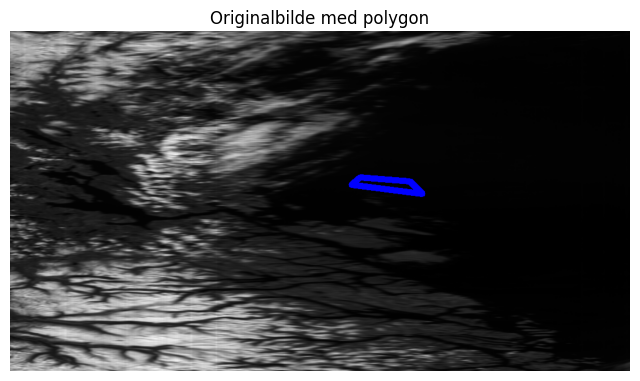

In [ ]:
importlib.reload(uf)

JG_RRS_H2_AC_A1 = uf.automated_RRS_H1_AC_for_H2(satobj_h1_250511_2, l1d_cube_250511_2, cube_norm_0511_h2, target_lat_1, target_lon_1, latitude_250511, longitude_250511)
JG_RRS_H2_AC_A2 = uf.automated_RRS_H1_AC_for_H2(satobj_h1_250511_2, l1d_cube_250511_2, cube_norm_0511_h2, target_lat_2, target_lon_2, latitude_250511, longitude_250511)
JG_RRS_H2_AC_A3 = uf.automated_RRS_H1_AC_for_H2(satobj_h1_250511_2, l1d_cube_250511_2, cube_norm_0511_h2, target_lat_3, target_lon_3, latitude_250511, longitude_250511)
JG_RRS_H2_AC_A5 = uf.automated_RRS_H1_AC_for_H2(satobj_h1_250511_2, l1d_cube_250511_2, cube_norm_0511_h2, target_lat_5, target_lon_5, latitude_250511, longitude_250511)
JG_RRS_H2_AC_A6 = uf.automated_RRS_H1_AC_for_H2(satobj_h1_250511_2, l1d_cube_250511_2, cube_norm_0511_h2, target_lat_6, target_lon_6, latitude_250511, longitude_250511)


In [ ]:
median_JG_RRS_H2_AC_A1 = np.median(JG_RRS_H2_AC_A1, axis=0)
median_JG_RRS_H2_AC_A2 = np.median(JG_RRS_H2_AC_A2, axis=0)
median_JG_RRS_H2_AC_A3 = np.median(JG_RRS_H2_AC_A3, axis=0)
median_JG_RRS_H2_AC_A5 = np.median(JG_RRS_H2_AC_A5, axis=0)
median_JG_RRS_H2_AC_A6 = np.median(JG_RRS_H2_AC_A6, axis=0)

print(median_JG_RRS_H2_AC_A1.shape)

(109,)


## Ecolight - S

/tmp/ipykernel_906470/1075601835.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


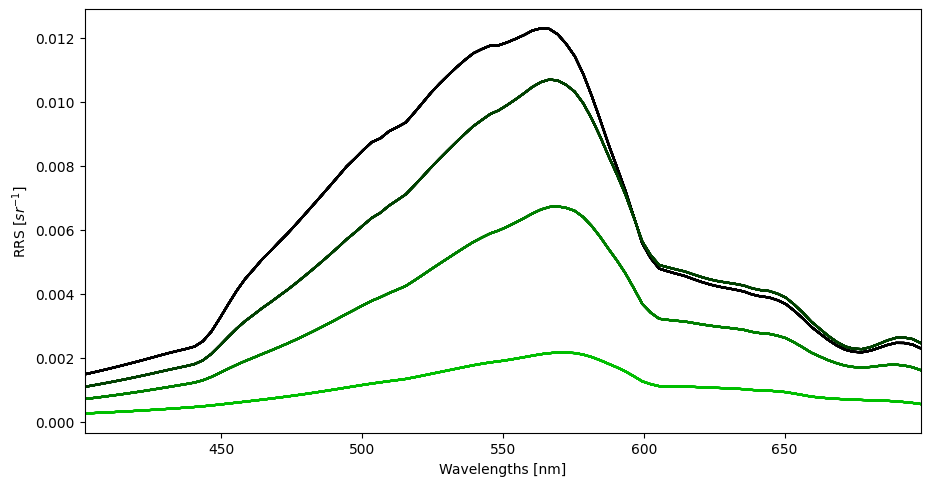

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) #number of rows in data file
# Number of colors
num_colors = ni
# Generate a sequence of colors
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output2025/rrsalltest" + "19" +".txt" ## alle spektrene ligger i siste fil. Så bare å iterere over rett linje her ## tror også det mnagler ett spektrum her, så antar da at det er det siste 
dataset_pathb = "../../ecolight-s/output/rrs_output2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_normal = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)

#lag en funksjon for dette, som også fikser fargene :))
#Aka lag en funksjon som bare kaller den andre funskjonen i en loop ellerno

for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_normal, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

### with changing water profile

/tmp/ipykernel_906470/1670799527.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


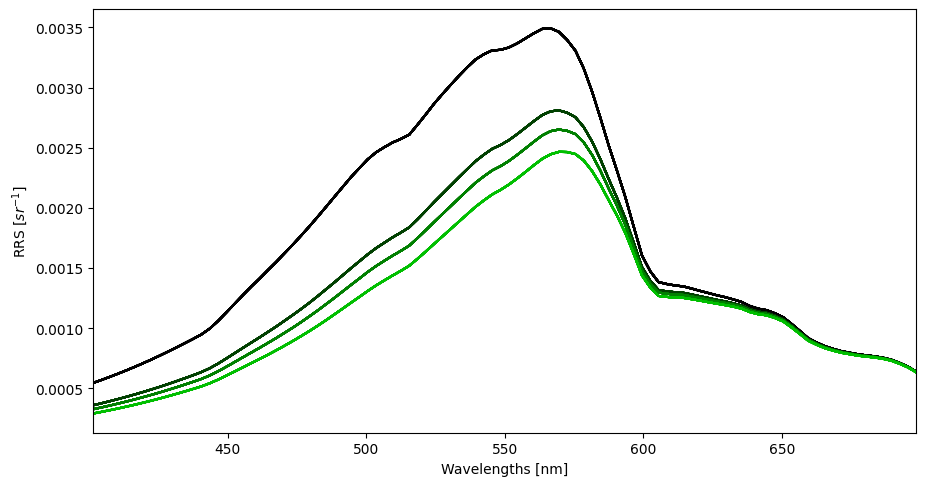

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) #number of rows in data file
# Number of colors
num_colors = ni
# Generate a sequence of colors
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output_profile2025/rrsalltest" + "19" +".txt" ## alle spektrene ligger i siste fil. Så bare å iterere over rett linje her ## tror også det mnagler ett spektrum her, så antar da at det er det siste 
dataset_pathb = "../../ecolight-s/output/rrs_output_profile2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_profile = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)

#lag en funksjon for dette, som også fikser fargene :))
#Aka lag en funksjon som bare kaller den andre funskjonen i en loop ellerno

for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_profile, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

### Adjusted profiles

/tmp/ipykernel_906470/4098015038.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


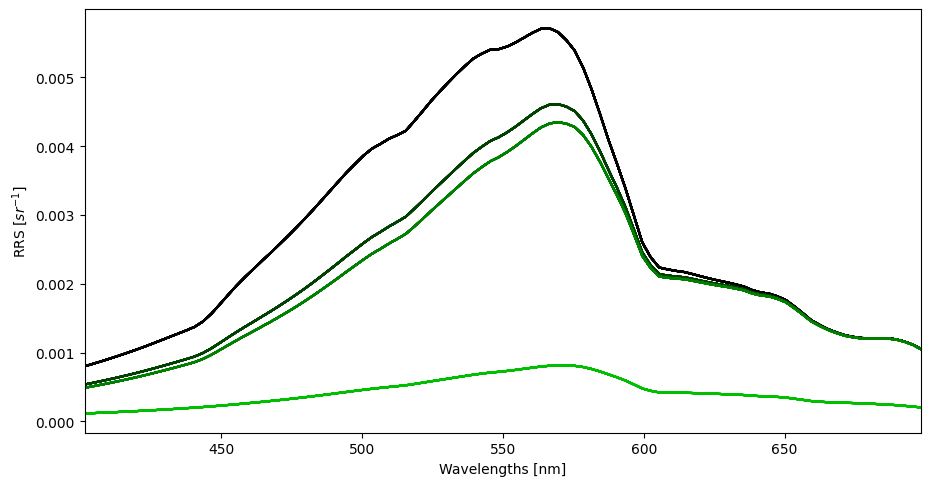

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) #number of rows in data file
# Number of colors
num_colors = ni
# Generate a sequence of colors
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output_profileb2025/rrsalltest" + "19" +".txt" ## alle spektrene ligger i siste fil. Så bare å iterere over rett linje her ## tror også det mnagler ett spektrum her, så antar da at det er det siste 
dataset_pathb = "../../ecolight-s/output/rrs_output_profileb2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_profile_b = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)

#lag en funksjon for dette, som også fikser fargene :))
#Aka lag en funksjon som bare kaller den andre funskjonen i en loop ellerno

for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_profile_b, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

### Ecolight profile C, variation between pythoplankton

/tmp/ipykernel_906470/3281074091.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


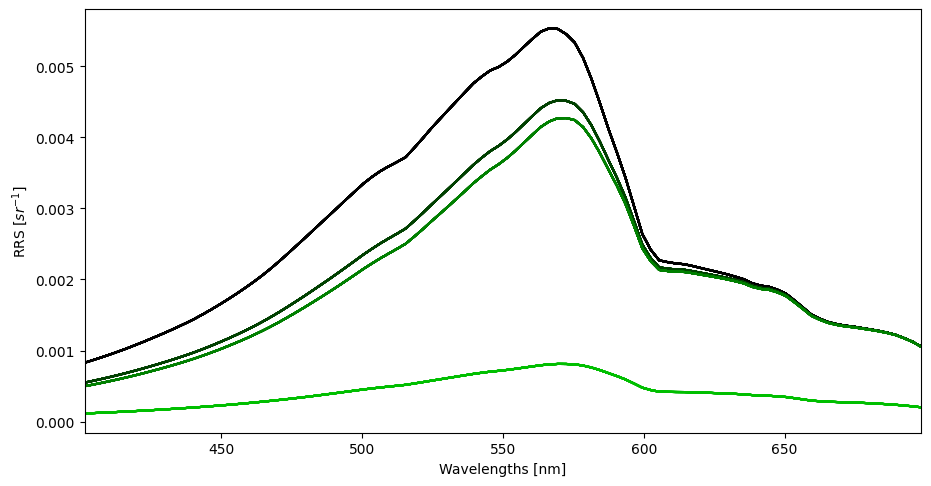

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) #number of rows in data file
# Number of colors
num_colors = ni
# Generate a sequence of colors
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output_profilec2025/rrsalltest" + "19" +".txt" ## alle spektrene ligger i siste fil. Så bare å iterere over rett linje her ## tror også det mnagler ett spektrum her, så antar da at det er det siste 
dataset_pathb = "../../ecolight-s/output/rrs_output_profilec2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_profile_c = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)

#lag en funksjon for dette, som også fikser fargene :))
#Aka lag en funksjon som bare kaller den andre funskjonen i en loop ellerno

for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_profile_c, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot

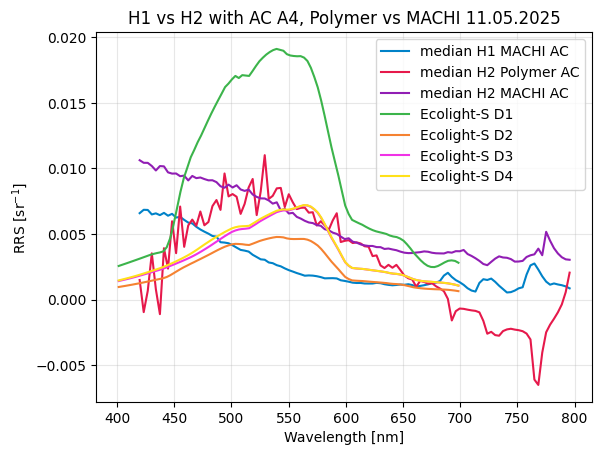

TypeError: 'numpy.float64' object is not callable

In [ ]:
#H1
#plt.plot(wl, RRS_median_H1_AC_A1, color="#1f77b4", linestyle= '-',  label='median H1 AC')
#plt.plot(wl, RRS_median_H1_AC_A2, color="#1f77b4", linestyle= '--', )#label='median H1 A2 AC')
#plt.plot(wl, RRS_median_H1_AC_A3, color="#1f77b4", linestyle= ':',  )#label='median H1 A3 AC')
plt.plot(wl, RRS_median_H1_AC_A5, color="#0082c8", linestyle= '-', label='median H1 MACHI AC')
#plt.plot(wl, RRS_median_H1_AC_A6, color="#1f77b4", linestyle= '-',  )#label='median H1 A5 AC',  marker="o")

#H2
#plt.plot(wl, RRS_median_H2_AC_A1, color="#2ca02c", linestyle= '-',  label='median H2 AC')
#plt.plot(wl, RRS_median_H2_AC_A2, color="#2ca02c", linestyle= '--', )#label='median H2 A2 AC')
#plt.plot(wl, RRS_median_H2_AC_A3, color="#2ca02c", linestyle= ':',  )#label='median H2 A3 AC')
plt.plot(wl, RRS_median_H2_AC_A5, color="#e6194b", linestyle= '-', label='median H2 Polymer AC')
#plt.plot(wl, RRS_median_H2_AC_A6, color="#2ca02c", linestyle= '-',  )#label='median H2 A5 AC',  marker="o")

#H2 JG AC
#plt.plot(wl, median_JG_RRS_H2_AC_A1, color="#e6194b", linestyle= '-',  label='median H2 JG AC')
#plt.plot(wl, median_JG_RRS_H2_AC_A2, color="#e6194b", linestyle= '--', )#label='median H2 A2 AC')
#plt.plot(wl, median_JG_RRS_H2_AC_A3, color="#e6194b", linestyle= ':',  )#label='median H2 A3 AC')
plt.plot(wl, median_JG_RRS_H2_AC_A5, color="#911eb4", linestyle= '-', label='median H2 MACHI AC')
#plt.plot(wl, median_JG_RRS_H2_AC_A6, color="#e6194b", linestyle= '-',  )#label='median H2 A5 AC',  marker="o")

# ECOLIGHT-S 
#plt.plot(wl_e, x_ecolight_normal[15, :], color="#3cb44b", linestyle= '-',  label='Ecolight-S normal')
#plt.plot(wl_e, x_ecolight_normal[16, :], color="#3cb44b", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_normal[17, :], color="#3cb44b", linestyle= ':',  )#label='median Ecolight-S A3')
plt.plot(wl_e, x_ecolight_normal[18, :], color="#3cb44b", linestyle= '-', label='Ecolight-S D1')
#plt.plot(wl_e, x_ecolight_normal[19, :], color="#3cb44b, linestyle= '-',  )#label='median Ecolight-S A5')
#
#plt.plot(wl_e, x_ecolight_profile[15, :], color="##f58231", linestyle= '-',  label='Ecolight-S w/ water profile')
#plt.plot(wl_e, x_ecolight_profile[16, :], color="##f58231", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_profile[17, :], color="##f58231", linestyle= ':',  )#label='median Ecolight-S A3')
plt.plot(wl_e, x_ecolight_profile[18, :], color="#f58231", linestyle= '-', label='Ecolight-S D2')
#plt.plot(wl_e, x_ecolight_profile[19, :], color="#f58231", linestyle= '-',  )#label='median Ecolight-S A5')

#plt.plot(wl_e, x_ecolight_profile_b[15, :], color="#f032e6", linestyle= '-',  label='Ecolight-S w/ water profile adjusted')
#plt.plot(wl_e, x_ecolight_profile_b[16, :], color="#f032e6", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_profile_b[17, :], color="#f032e6", linestyle= ':',  )#label='median Ecolight-S A3')
plt.plot(wl_e, x_ecolight_profile_b[18, :], color="#f032e6", linestyle= '-',  label='Ecolight-S D3' )#label='median Ecolight-S A4')
#plt.plot(wl_e, x_ecolight_profile_b[19, :], color="#f032e6", linestyle= '-',  )#label='median Ecolight-S A5')


#plt.plot(wl_e, x_ecolight_profile_c[15, :], color="#ffe119", linestyle= '-',  label='Ecolight-S w/ water profile adjusted')
#plt.plot(wl_e, x_ecolight_profile_c[16, :], color="#ffe119", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_profile_c[17, :], color="#ffe119", linestyle= ':',  )#label='median Ecolight-S A3')
plt.plot(wl_e, x_ecolight_profile_c[18, :], color="#ffe119", linestyle= '-',  label='Ecolight-S D4' )#label='median Ecolight-S A4')
#plt.plot(wl_e, x_ecolight_profile_c[19, :], color="#ffe119", linestyle= '-',  )#label='median Ecolight-S A5')

# plt.plot(wl_e, x[picture_id, :], linestyle='-', color=colors2[picture_id])

plt.xlabel("Wavelength [nm]")
plt.ylabel("RRS [sr$^{-1}$] ") #Er begge water leaving radience???
plt.title("H1 vs H2 with AC A4, Polymer vs MACHI 11.05.2025") ## bruke AC som Atmosperic Correction 
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../resultater/medEcolight/H1vsH2_ecolight_JG.pdf', dpi=300, bbox_inches='tight')
plt.show()

## få inn ecolighs her 
## fikse plottings alg, så det er så enkelt å kjapt du kan få det... Fortsette på det du har gjort. Bra jobba
## fikse så du kan vise disse plotsa til Esmée i morgen så hu kan lage flere ulike til torsdag :)) Da dette kan diskuteres med Morten


## Extracting the most simular spectrum to find the concentrationns of the phytoplankton.

/tmp/ipykernel_906470/2563370401.py:27: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


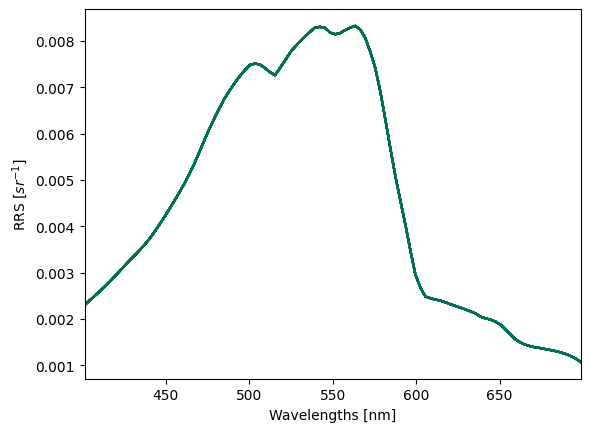

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_var_A5_110525.csv') 
ni = len(data['sun_angle']) #number of rows in data file
# Number of colors
num_colors = ni
# Generate a sequence of colors
#colors2 = [(0, i / num_colors, 0) for i in range(ni)]  
colors2 = [(0, 0.2 + 0.8 * i / (ni - 1), 0.5 * (1 - i / (ni - 1))) for i in range(ni)]


#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output_profile_A5_110525/rrsalltest" + "30" +".txt" ## alle spektrene ligger i siste fil. Så bare å iterere over rett linje her ## tror også det mnagler ett spektrum her, så antar da at det er det siste 
dataset_pathb = "../../ecolight-s/output/rrs_output_profile_A5_110525/rrsalltestB" + "30" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_profile_d = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)

#lag en funksjon for dette, som også fikser fargene :))
#Aka lag en funksjon som bare kaller den andre funskjonen i en loop ellerno
rrs_comparison_list = []

for i in range(0,31): ## Kun endre denne linjen for å endre plottet
    #plot_spectral_data(x_ecolight_profile_d, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i
    rrs_comparison_list.append(x_ecolight_profile_d)

#plot_spectral_data(x_ecolight_profile_d, wl_e, 7)
#plot_spectral_data(x_ecolight_profile_d, wl_e, 8)
plot_spectral_data(x_ecolight_profile_d, wl_e, 9)
#plot_spectral_data(x_ecolight_profile_d, wl_e, 10)
#plot_spectral_data(x_ecolight_profile_d, wl_e, 11)

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

#plt.tight_layout()
#plt.gcf().set_size_inches(10, 5)
#plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
#plt.show()

#print(rrs_comparison_list)


In [ ]:
#import numpy as np
#from scipy.interpolate import interp1d
#
## Define interpolation grid (1 nm steps)
#common_wl = np.arange(420, 691, 1)
#
## Interpolate target spectrum to common grid
#interp_target = interp1d(wl, RRS_median_H2_AC_A5, kind='linear', bounds_error=False, fill_value='extrapolate')
#target_interp = interp_target(common_wl)
#
## Prepare to track best match
#min_error = float('inf')
#best_match_idx = None
#best_match_spectrum = None
#
## Iterate through all sets in the comparison list
#for i, rrs_array in enumerate(rrs_comparison_list):
#    for j in range(rrs_array.shape[0]):
#        spectrum = rrs_array[j, :]
#        interp_fn = interp1d(wl_e, spectrum, kind='linear', bounds_error=False, fill_value='extrapolate')
#        spectrum_interp = interp_fn(common_wl)
#
#        # Compute RMSE (can use MAE or other metrics)
#        error = np.sqrt(np.mean((target_interp - spectrum_interp) ** 2))
#
#        if error < min_error:
#            min_error = error
#            best_match_idx = (i, j)
#            best_match_spectrum = spectrum_interp
#
#print(f"Best match found in rrs_comparison_list[{best_match_idx[0]}][{best_match_idx[1]}] with RMSE: {min_error}")


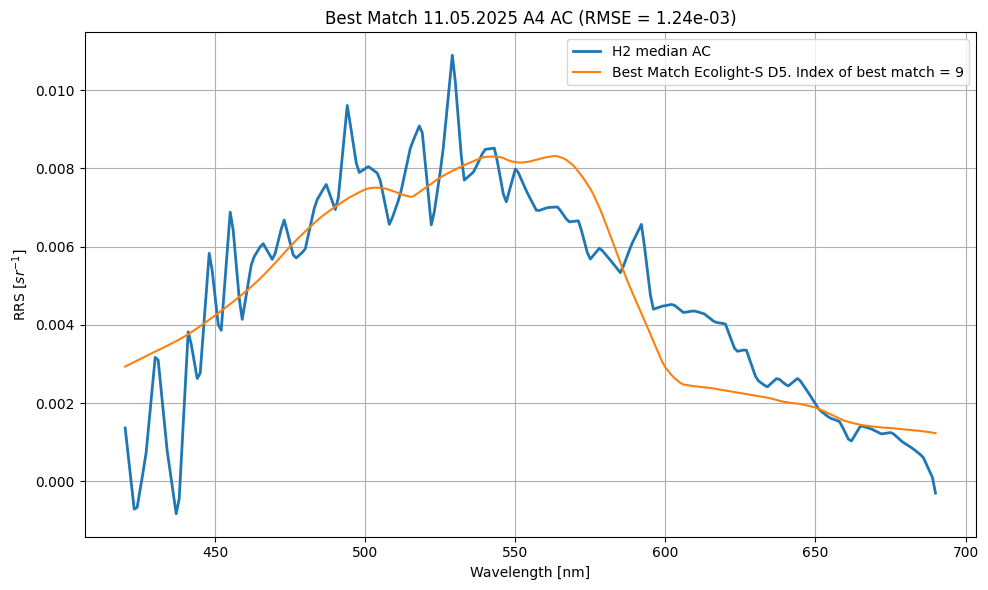

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Common interpolation grid
common_wl = np.arange(420, 691, 1)

# Interpolate the target spectrum
interp_target = interp1d(wl, RRS_median_H2_AC_A5, kind='linear', bounds_error=False, fill_value='extrapolate')
target_interp = interp_target(common_wl)

# Initialize tracking variables
min_error = float('inf')
best_match_idx = None
best_match_spectrum_interp = None

# Loop through the comparison list
for i, rrs_array in enumerate(rrs_comparison_list):
    for j in range(rrs_array.shape[0]):
        spectrum = rrs_array[j, :]
        interp_fn = interp1d(wl_e, spectrum, kind='linear', bounds_error=False, fill_value='extrapolate')
        spectrum_interp = interp_fn(common_wl)

        # Compute RMSE
        error = np.sqrt(np.mean((target_interp - spectrum_interp) ** 2))  ## RMSE root mean square error!!! Sjekke om denne burde forklares i teroeien. I andre oder har du brukt eucleadian distance sjekk om dette eksla forklaeres i teroein også

        if error < min_error:
            min_error = error
            best_match_idx = (i, j)
            best_match_spectrum_interp = spectrum_interp

print = (min_error)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(common_wl, target_interp, label='H2 median AC', linewidth=2)
plt.plot(common_wl, best_match_spectrum_interp, label=f'Best Match Ecolight-S D5. Index of best match = {best_match_idx[1]}', linestyle='-') ## tewkke fra en så får man linjen de er i fila
plt.xlabel('Wavelength [nm]')
plt.ylabel("RRS [$sr^{-1}$]")
plt.title(f'Best Match 11.05.2025 A4 AC (RMSE = {min_error:.2e})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../resultater/medEcolight/H2_best_match.pdf', dpi=300, bbox_inches='tight')
plt.show()




### vairns i plottene

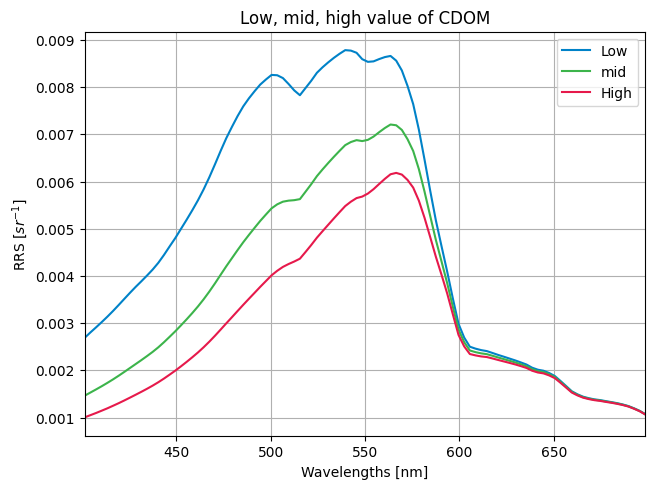

In [ ]:
#plot_spectral_data(x_ecolight_profile_d, wl_e, 0)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

plt.plot(wl_e, x_ecolight_profile_d[10, :], linestyle='-', color='#0082c8', label = 'Low')
plt.plot(wl_e, x_ecolight_profile_d[0, :], linestyle='-', color='#3cb44b', label = 'mid')
plt.plot(wl_e, x_ecolight_profile_d[5, :], linestyle='-', color='#e6194b', label = 'High')

plt.legend()
plt.title('Low, mid, high value of CDOM')
plt.grid(True)
plt.tight_layout()
plt.xlabel("Wavelengths [nm]")
plt.ylabel("RRS [$sr^{-1}$]")
plt.xlim(401.5, 698.5)
plt.savefig('../resultater/medEcolight/cdom_lmh.pdf', dpi=300, bbox_inches='tight')
plt.show()

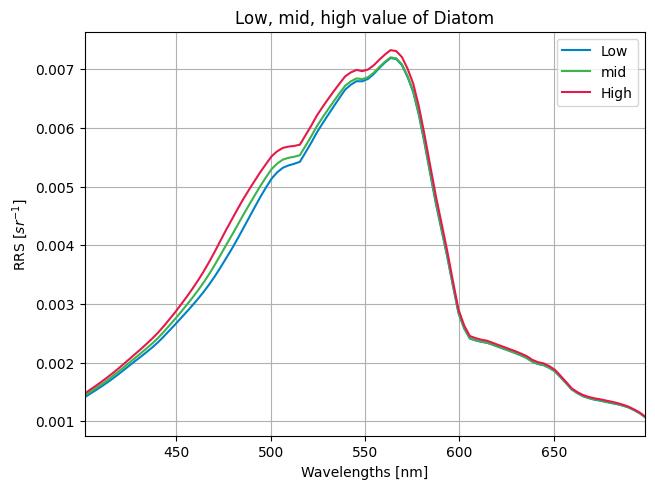

In [ ]:
#plot_spectral_data(x_ecolight_profile_d, wl_e, 0)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

plt.plot(wl_e, x_ecolight_profile_d[19, :], linestyle='-', color='#0082c8', label = 'Low')
plt.plot(wl_e, x_ecolight_profile_d[14, :], linestyle='-', color='#3cb44b', label = 'mid')
plt.plot(wl_e, x_ecolight_profile_d[20, :], linestyle='-', color='#e6194b', label = 'High')

plt.legend()
plt.title('Low, mid, high value of Diatom')
plt.grid(True)
plt.tight_layout()
plt.xlabel("Wavelengths [nm]")
plt.ylabel("RRS [$sr^{-1}$]")
plt.xlim(401.5, 698.5)
plt.savefig('../resultater/medEcolight/diatom_lmh.pdf', dpi=300, bbox_inches='tight')
plt.show()

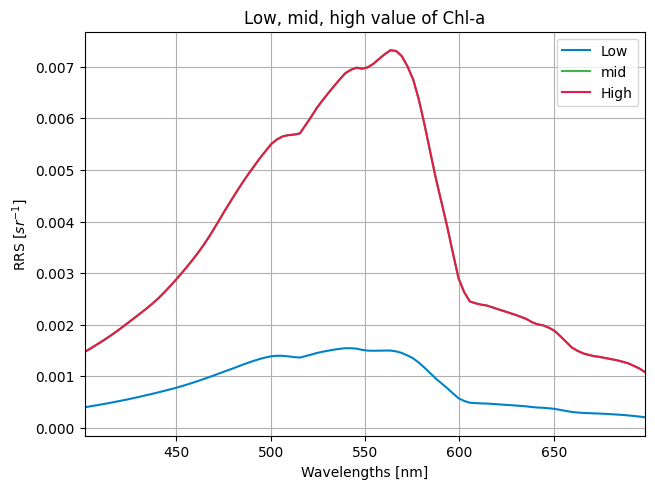

In [ ]:
plt.plot(wl_e, x_ecolight_profile_d[29, :], linestyle='-', color='#0082c8', label = 'Low')
plt.plot(wl_e, x_ecolight_profile_d[22, :], linestyle='-', color='#3cb44b', label = 'mid')
plt.plot(wl_e, x_ecolight_profile_d[30, :], linestyle='-', color='#e6194b', label = 'High')

plt.legend()
plt.title('Low, mid, high value of Chl-a')
plt.grid(True)
plt.tight_layout()
plt.xlabel("Wavelengths [nm]")
plt.ylabel("RRS [$sr^{-1}$]")
plt.xlim(401.5, 698.5)
plt.savefig('../resultater/medEcolight/chla_lmh.pdf', dpi=300, bbox_inches='tight')
plt.show()

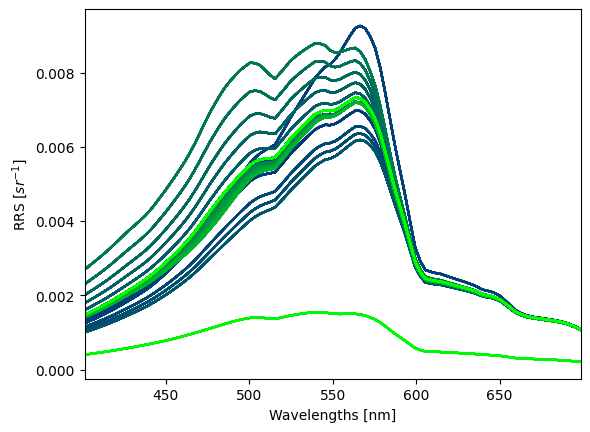

In [ ]:
for i in range(31): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_profile_d, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i